In [1]:
function thomas(a,b,c,d)
    last_x_index = length(a)  # 要素数を算出
    # Thomas法の算出する係数
    g = zeros(Float64, last_x_index)
    s = zeros(Float64, last_x_index)
    u = zeros(Float64, last_x_index)
    # 係数を算出していく
    for i = first_x_index:last_x_index
        if i==1
            g[i] = b[i]
            s[i] = d[i]
        else
            g[i] = b[i] - a[i]*c[i-1] / g[i-1]
            s[i] = d[i] - a[i]*s[i-1] / g[i-1]
        end
    end
    # 一番最後の方程式の解を求める
    u[last_x_index] = s[last_x_index] / g[last_x_index]
    # 解を求める 
    for j = reverse(first_x_index:last_x_index)  # 逆からループする
        if j==last_x_index
            continue
        end
        u[j] = (s[j] - c[j]*u[j+1]) / g[j] 
    end
    return u
end

thomas (generic function with 1 method)

In [2]:

n = 20 # mesh number for x
Δx = 1/n
# 元のコードは、数式[0,n] -> [1,n+1]の格子になっていた。
# おそらく、Fortranが1インデックスから始まるためにそれに合わせたのだと思われる。
# しかし、ややこしいので、[0,n] の格子を使う。境界条件の 0,nは常に0なので省いて、[1,n-1]の配列を常に考える。
first_x_index = 1  # il
last_x_index = n-1  # i

# n個の要素で0で初期化したベクトルを作成。Thomas法の係数部分に当たる。別にこういうふうに書く必要はあまりない。
a = zeros(Float64, last_x_index)
b = zeros(Float64, last_x_index)
c = zeros(Float64, last_x_index)
d = zeros(Float64, last_x_index)
# 係数行列と照らし合わせて、Thomas法の係数に当たるものを入れていく。
# i は行の番号。
for i = first_x_index:last_x_index  # i = 1,2,...,n-1
    a[i] = 1
    b[i] = Δx^2 - 2
    c[i] = 1
    d[i] = -i * Δx^3
end

u = thomas(a,b,c,d)

19-element Vector{Float64}:
 0.009397210156336624
 0.018645927287282406
 0.027598029600009982
 0.03610613683873754
 0.04402397873536826
 0.05120676068516055
 0.05751152573323995
 0.06279751196698626
 0.06692650442081509
 0.0697631806135919
 0.07117544885483472
 0.07103477847394046
 0.06921652114686136
 0.06560022251691512
 0.06006992333067659
 0.05251444933611135
 0.042827689218205844
 0.03090885987725483
 0.01666275838661068

In [3]:
# 解析解を作る
u_analytical = Vector{Float64}()
x_array = Vector{Float64}() 
for i = first_x_index:last_x_index
    x = Δx * i
    push!(x_array, x)
    u_ = sin(x)/sin(1) - x
    push!(u_analytical, u_)  # 空の配列 u_analytical に u_ を追加する。
end
u_analytical

19-element Vector{Float64}:
 0.009395000152130399
 0.018641543736198585
 0.027591545248247834
 0.03609766038506532
 0.044013654328204754
 0.05119476725487487
 0.05749807616210695
 0.06278285209982931
 0.06691091191995241
 0.06974696366227462
 0.07115894471392381
 0.07101835189711314
 0.06920056266016172
 0.06558514656897252
 0.060056166320397564
 0.05250246752511789
 0.04281795653572784
 0.030901865625601932
 0.016659004855731574

In [4]:
# A / B は Aに右からBの逆行列を掛ける操作になる。
# A ./ B は要素同士の割り算。　ドット演算はドットをつける。
# 元のコードと同じエラーを算出
err = (u - u_analytical) ./ u_analytical * 100

19-element Vector{Float64}:
 0.023523195002008872
 0.02351495748342462
 0.023501227291936516
 0.023482002938151822
 0.023457282339056515
 0.0234270628206341
 0.023391341120843286
 0.0233501133934365
 0.023303375212302118
 0.02325112157684648
 0.02319334691830957
 0.02313004510597449
 0.023061209455775982
 0.022986832737726823
 0.022906907186900086
 0.02282142451253136
 0.022730375911054982
 0.02263375207710754
 0.022531543220094114

In [5]:
# ファイルを書き出す。 適当なら以下でOK
open("output.dat", "w") do out
    Base.print_array(out, hcat(x_array[:], u[:], u_analytical[:], err[:]))
end

In [6]:
# ちゃんと書き出し方を指定したい場合は以下
using Printf
open( "output.dat", "w" ) do out
    [@printf(out, "%7.7e %7.7e %7.7e %7.7e\n", x_array[k], u[k], u_analytical[k], err[k]) for k=1:length(x_array[:])]
end

19-element Vector{Nothing}:
 nothing
 nothing
 nothing
 nothing
 nothing
 nothing
 nothing
 nothing
 nothing
 nothing
 nothing
 nothing
 nothing
 nothing
 nothing
 nothing
 nothing
 nothing
 nothing

In [7]:
# ライブラリがない場合は、実行する
# ターミナルから以下を実行(Mac)。ffmpegがないと、Plotsが動かない
#brew install ffmpeg


In [9]:
# ライブラリがない場合は、実行する。
using Pkg
Pkg.add("FFMPEG")
Pkg.add("ImageMagick")
Pkg.build("ImageMagick")
Pkg.add("Plots")
Pkg.update()

   Resolving package versions...


    Updating `~/.julia/environments/v1.9/Project.toml`
⌃ [c87230d0] + FFMPEG v0.2.4
  No Changes to `~/.julia/environments/v1.9/Manifest.toml`


   Resolving package versions...


  No Changes to `~/.julia/environments/v1.9/Project.toml`
  No Changes to `~/.julia/environments/v1.9/Manifest.toml`


   Resolving package versions...


  No Changes to `~/.julia/environments/v1.9/Project.toml`
  No Changes to `~/.julia/environments/v1.9/Manifest.toml`


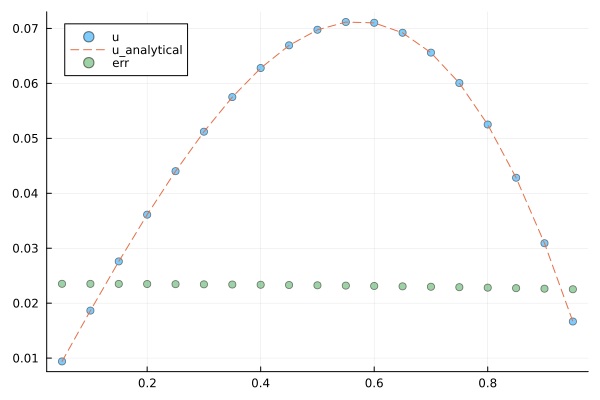

In [15]:
# プロットする。
using Plots
p = plot()
scatter!(x_array, u, alpha=0.5, line_width=5, label="u")
plot!(x_array, u_analytical, linestyle=:dash, label="u_analytical")
scatter!(x_array, err, alpha=0.5, line_width=5, label="err")

In [16]:
# 保存
savefig(p, "BVP.png")

"/Users/smamitsu/Github/Basics_of_fluid_analysis/1_Thomas/Julia/BVP.png"